#### Dataset Summary
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.

In [4]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import DistanceMetric
from sklearn.datasets import make_classification

# import a Python library for easily displaying tabular data in a visually appealing ASCII table format
# refer to https://pypi.org/project/prettytable/
from prettytable import PrettyTable

(b) Pre-Processing and Exploratory data analysis:
  i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

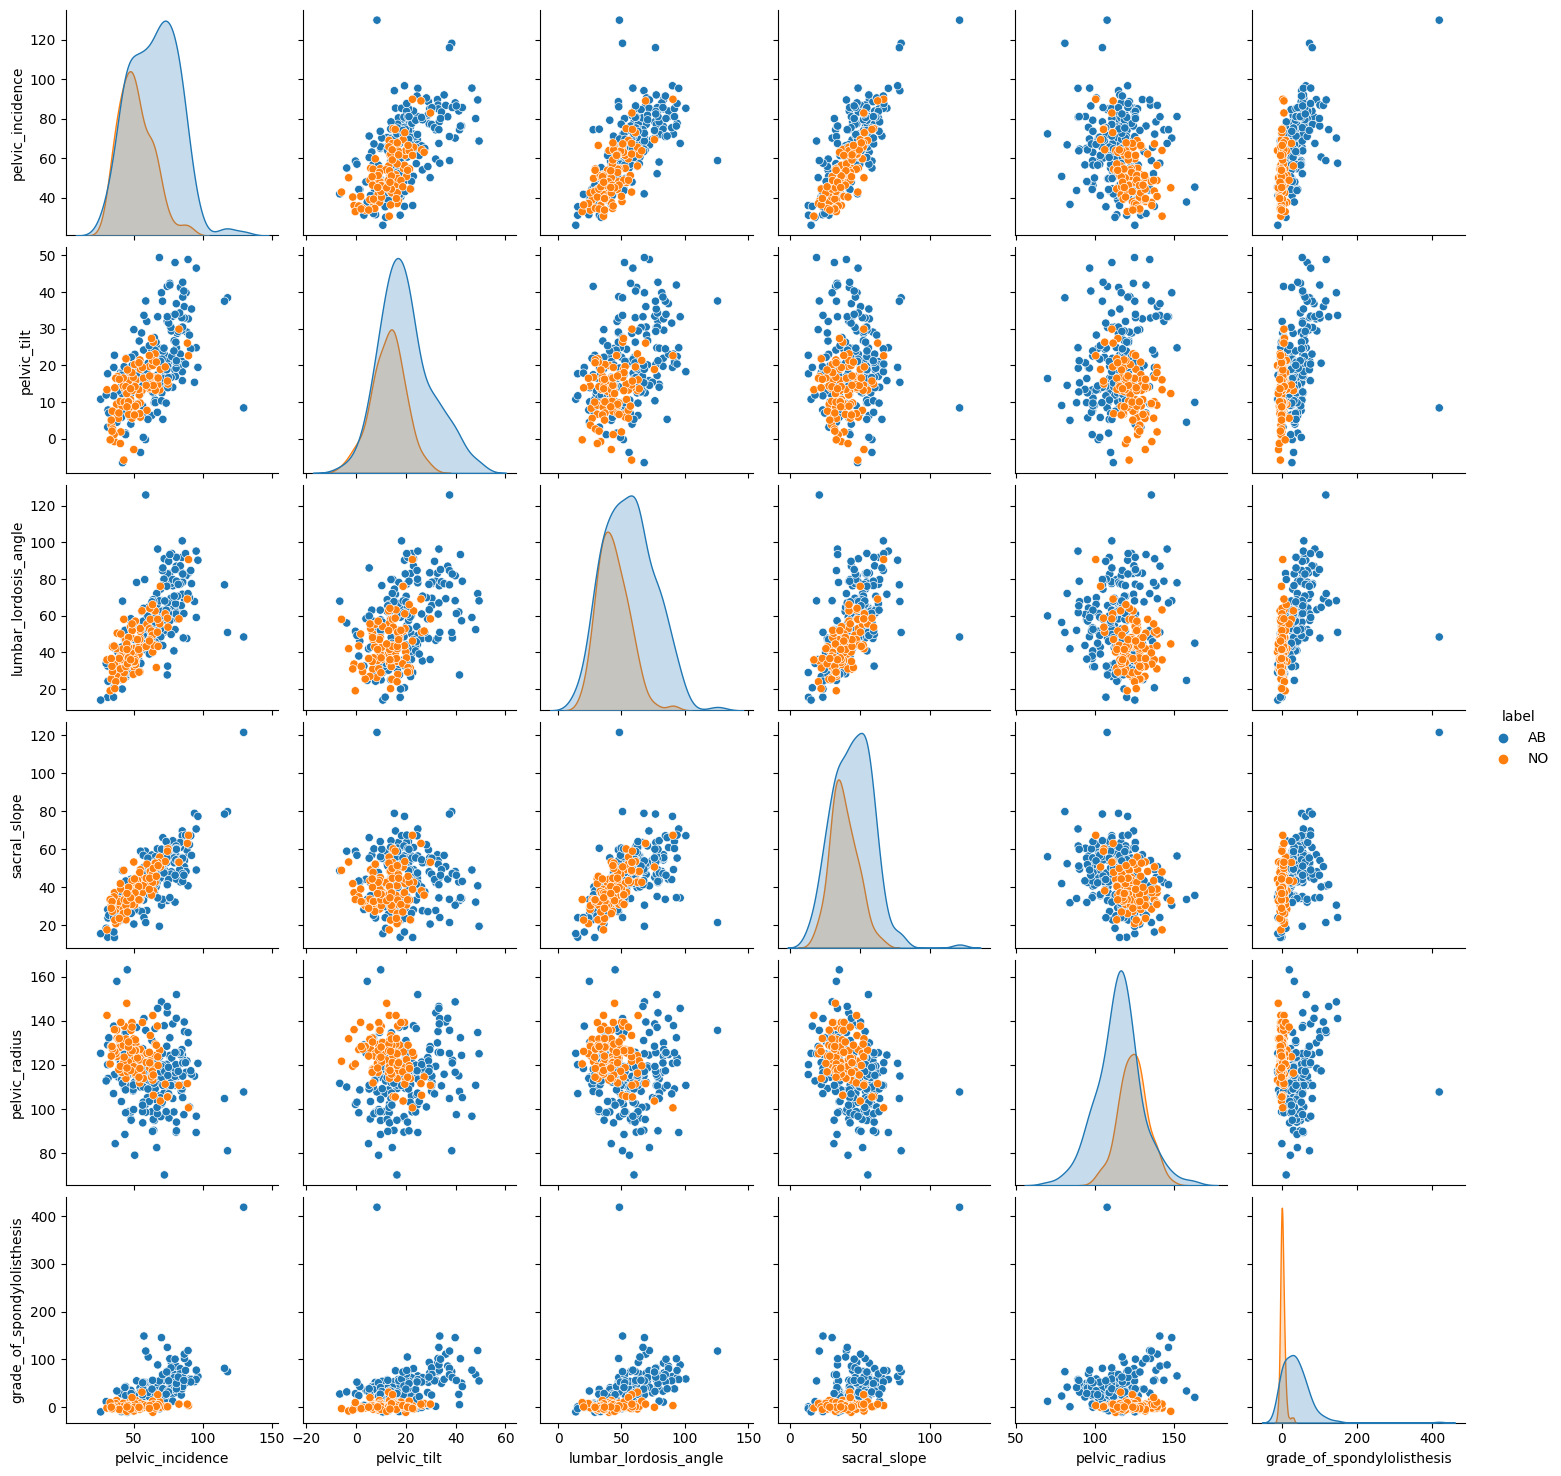

In [5]:
# read the file
NAMES = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", 
         "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis", "label"]

PATH = '../data/vertebral_column_data/column_2C.dat'

df = pd.read_csv(PATH, header=None, delimiter=" ", names=NAMES)

# make scatterplots of the independent variables in the dataset
fig = sns.pairplot(data = df, hue = "label")


In [6]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [7]:
# change labels from strings to numbers for easier processing
number = LabelEncoder()
df['label'] = number.fit_transform(df['label'].astype('str'))
df['label'] = 1 - df['label']
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


(b)ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

pelvic_incidence


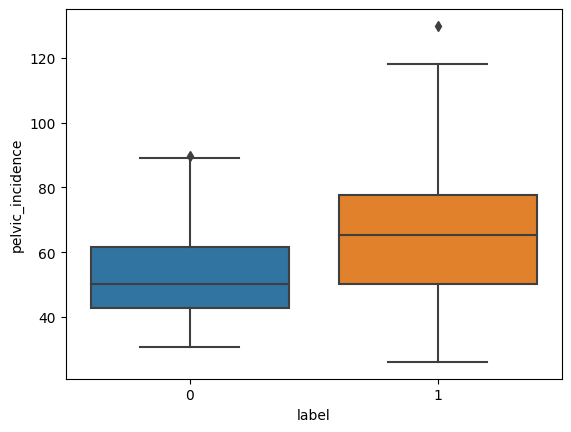

pelvic_tilt


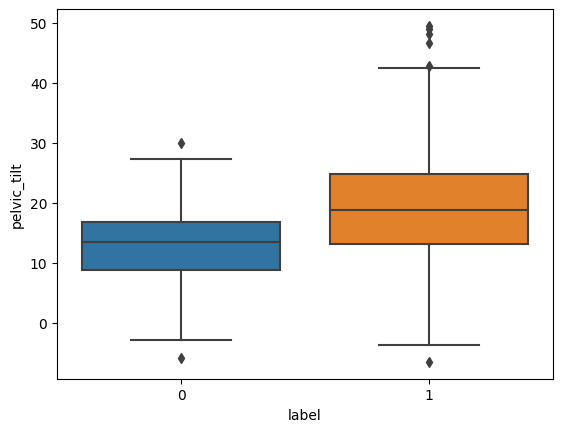

lumbar_lordosis_angle


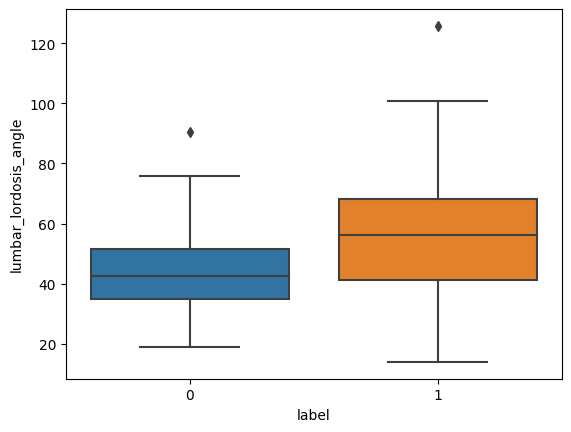

sacral_slope


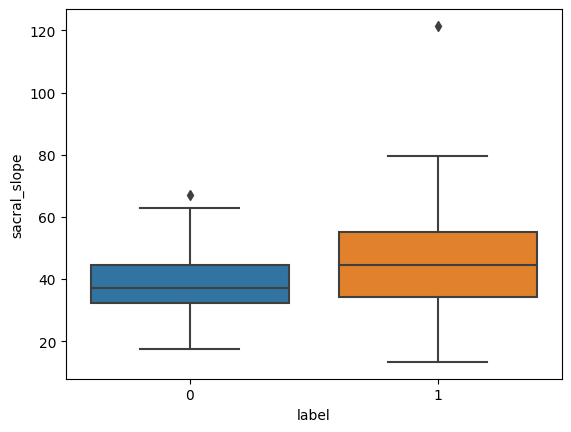

pelvic_radius


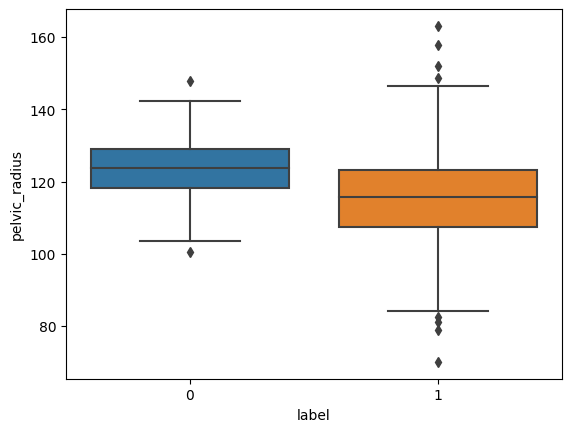

grade_of_spondylolisthesis


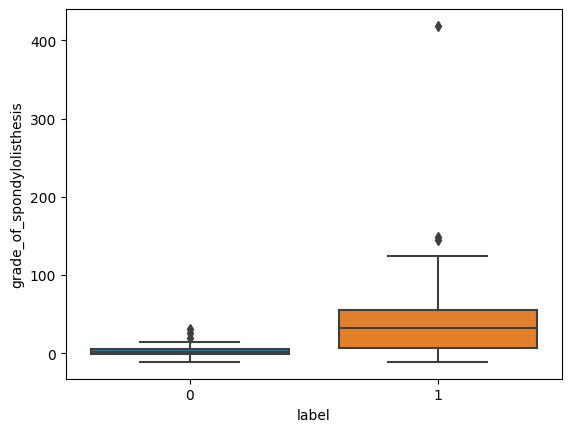

In [8]:
# use a loop to make boxplots for each of the independent variables
for i in range(0, len(df.columns) - 1):
    # print the variable name
    print(df.columns[i])
    sns.boxplot(data=df, x="label", y=df.columns[i])
    plt.show()




(b)iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [9]:
# divide dataset into training and testing sets
train_class_0 = df[df['label'] == 0].head(70)
train_class_1 = df[df['label'] == 1].head(140)

# Concatenate the two training sets
train_set = pd.concat([train_class_0, train_class_1])

# Create the test set by excluding the rows in the training set
test_set = df.drop(train_set.index)
train_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


(c) Classification using KNN on Vertebral Column Data Set
  i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [10]:
# separating training dataset into features x and labels y
train_x = train_set.drop('label', axis=1)
train_y = train_set['label']

# separating testing dataset into features x and labels y
test_x = test_set.drop('label', axis=1)
test_y = test_set['label']

# using sklearn's knn for training the model
knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
knn.fit(train_x, train_y)

KNeighborsClassifier(metric='euclidean')

(c)ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k = k∗.

In [11]:
train_errors = []
test_errors = []
min_error = float("inf")
best_val = 5

for k in range(1, 209, 3):
    knnTest = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knnTest.fit(train_x, train_y)
    
    # compute, compare and append train/test errors for each k
    train_curr = 1 - accuracy_score(train_y, knnTest.predict(train_x))
    train_errors.append(train_curr)

    test_curr = 1 - accuracy_score(test_y, knnTest.predict(test_x))
    test_errors.append(test_curr)

    # update the best value of k and the min_error
    if test_curr < min_error:
        best_val = k
        min_error = test_curr
    
    
    
print(f"The most suitable k among those values is {best_val}, which has test error as {round(min_error, 2)}")

The most suitable k among those values is 4, which has test error as 0.06


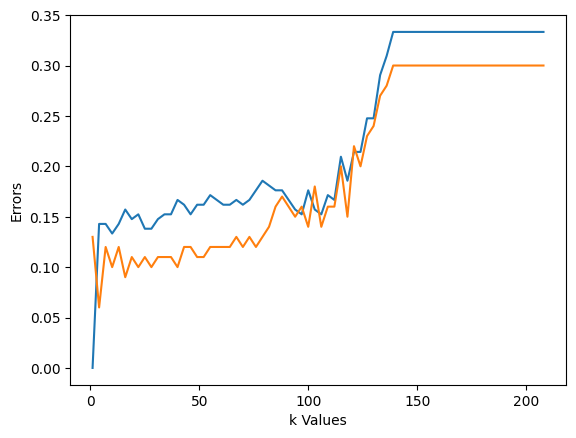

In [12]:
# Plot train and test errors in terms of k
plt.plot(range(1, 209, 3), train_errors, label="train errors")
plt.plot(range(1, 209, 3), test_errors, label="test errors")

plt.gca().set_xlabel("k Values")
plt.gca().set_ylabel("Errors")
plt.show()

In [13]:
# k* = 4, calculate when k = k*
knn1 = KNeighborsClassifier(n_neighbors = best_val, metric='euclidean')
knn1.fit(train_x, train_y)

# predict labels based on test features
predict_results = knn1.predict(test_x)

# get confusion matrix
conf_matrix = confusion_matrix(test_y, predict_results)

# get values based on confusion matrix
true_posi = conf_matrix[1][1]
true_nega = conf_matrix[0][0]
false_posi = conf_matrix[0][1]
false_nega = conf_matrix[1][0]

true_posi_rate =  true_posi / (true_posi + false_nega)
true_nega_rate = true_nega / (false_posi + true_nega)
precision = true_posi / (true_posi + false_posi)
recall_rate = true_posi / (true_posi + false_nega)
f1_score = 2 * (precision * recall_rate) / (precision + recall_rate)


print("Confusion Matrix: ")
print(conf_matrix)

print("True positive rate: " + str(round(true_posi_rate, 2)))
print("True negative rate: " + str(round(true_nega_rate, 2)))
print("Precision: " + str(round(precision, 2)))
print("F1-score: " + str(round(f1_score, 2)))



Confusion Matrix: 
[[25  5]
 [ 1 69]]
True positive rate: 0.99
True negative rate: 0.83
Precision: 0.93
F1-score: 0.96


(c)iii.Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.
Note: for each N, select your training set by choosing the first [N/3] rows of Class 0 and the first
N − [N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve.

In [14]:
best_ks = []
min_errors = []

for n in range(10, 211, 10):
    # concatenate trainset
    train_curr_0 = train_set[train_set['label'] == 0].head(n // 3)
    train_curr_1 = train_set[train_set['label'] == 1].head(n - n // 3)
    truncated_train_set = pd.concat([train_curr_0, train_curr_1])

    # divide x and y
    truncated_train_x = truncated_train_set.drop('label', axis=1)
    truncated_train_y = truncated_train_set['label']
    
    best_k = 0
    min_error = float("inf")

    # go over each k and find the most suitable one
    for k in range(1, n + 1, 5):
        knn_curr = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
        knn_curr.fit(truncated_train_x, truncated_train_y)

        predict_curr_results = knn_curr.predict(test_x)
        curr_error = 1 - accuracy_score(test_y, predict_curr_results)

        # update k and min error
        if (curr_error < min_error):
            best_k = k
            min_error = round(curr_error, 2)
            
    
    best_ks.append(best_k)
    min_errors.append(min_error)


print("The optimal ks for each trainset of different sizes:")
print(best_ks)

print("The best test error rate for each trainset of different sizes:")
print(min_errors)

The optimal ks for each trainset of different sizes:
[1, 6, 1, 11, 26, 21, 26, 31, 41, 6, 6, 16, 16, 16, 16, 6, 6, 16, 6, 6, 6]
The best test error rate for each trainset of different sizes:
[0.25, 0.2, 0.22, 0.25, 0.3, 0.29, 0.29, 0.29, 0.29, 0.25, 0.22, 0.17, 0.16, 0.15, 0.13, 0.13, 0.13, 0.1, 0.09, 0.09, 0.08]


No handles with labels found to put in legend.


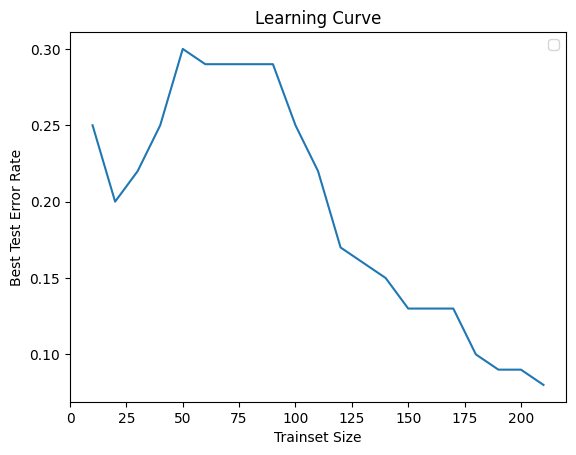

In [15]:
# Plot the best test error rate
plt.plot(range(10, 211, 10), min_errors)
plt.gca().set_title("Learning Curve")
plt.gca().set_xlabel("Trainset Size")
plt.gca().set_ylabel("Best Test Error Rate")
plt.gca().legend()
plt.show()


(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

i. Minkowski Distance:
A. which becomes Manhattan Distance with p = 1.

In [16]:
# run knn by just changing metric and return k-error dictionary
def run_knn(train_set, test_set, p_value, k_series, curr_metric, weights='uniform'):
    
    train_x = train_set.drop('label', axis=1)
    train_y = train_set['label']

    test_x = test_set.drop('label', axis=1)
    test_y = test_set['label']
    
    # if mahalanobis distance is used, options = {"VI": covI}, else None
    # refer to https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics
    options = None
    if curr_metric == "mahalanobis":
        options = {"VI": np.linalg.pinv(np.cov(train_x, rowvar=False))}
    else:
        options = None
    
    k_error = {}
    
    for k in k_series:
        curr_knn = KNeighborsClassifier(n_neighbors=k, p=p_value, metric=curr_metric, weights=weights, metric_params=options)
        curr_knn.fit(train_x, train_y)

        testing_error = 1 - accuracy_score(test_y, curr_knn.predict(test_x))
        k_error[k] = round(testing_error, 2)
        
    return k_error

# refer to https://pypi.org/project/prettytable/
def generate_table(headers, rows):
    pt = PrettyTable()
    pt.field_names = headers
    for row in rows:
        pt.add_row(row)
    return pt


def get_ks(k_error):
    sorted_k_error = {}
    sorted_ks = sorted(k_error, key=k_error.get)

    for k in sorted_ks:
        sorted_k_error[k] = k_error[k]
    
    tmp = sorted_k_error[list(sorted_k_error)[0]]
    res = {}
    for key, value in sorted_k_error.items():
        if sorted_k_error[key] != tmp:
            break
        res[key] = value
    return res





i. Minkowski Distance:
A. which becomes Manhattan Distance with p = 1.

In [17]:
# use run_knn with metric changed to manhattan distance
k_error = run_knn(train_set, test_set, 1, range(1, 201, 5), "manhattan", "uniform")
manhattan_dic = get_ks(k_error)

headers_mhtt = ["Optimal k Values", "Minimum Errors"]
rows_mhtt = []
for key, value in manhattan_dic.items():
    rows_mhtt.append([key, value])
print(generate_table(headers_mhtt, rows_mhtt))

+------------------+----------------+
| Optimal k Values | Minimum Errors |
+------------------+----------------+
|        6         |      0.11      |
|        11        |      0.11      |
|        26        |      0.11      |
+------------------+----------------+


(d)iB. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [18]:
trainp_x = train_set.drop('label', axis=1)
trainp_y = train_set['label']


testp_x = test_set.drop('label', axis=1)
testp_y = test_set['label']
    
errors= []
    
for p in np.logspace(0.1, 1, 10):
    knnp = KNeighborsClassifier(n_neighbors=6, p=p, metric="minkowski")
    knnp.fit(trainp_x, trainp_y)

    curr_error = 1 - accuracy_score(testp_y, knnp.predict(testp_x))
    errors.append(curr_error)
        
p_res = pd.DataFrame({
    "P": np.logspace(0.1, 1, 10),
    "lg(p)": np.linspace(0.1, 1, 10),
    "errors": errors
})

# show the best log10(p) with minimum error
minp_error = min(p_res["errors"])
p_res[p_res["errors"] == minp_error]

,P,lg(p),errors
5,3.981072,0.6,0.06


(d)iC. which becomes Chebyshev Distance with p → ∞

In [19]:
# use run_knn with metric changed to chebyshev distance
k_error = run_knn(train_set, test_set, 1, range(1, 201, 5), "chebyshev", "uniform")
chebyshev_dic = get_ks(k_error)

headers_chsh = ["Optimal k Values", "Minimum Errors"]
rows_chsh = []
for key, value in chebyshev_dic.items():
    rows_chsh.append([key, value])
print(generate_table(headers_chsh, rows_chsh))

+------------------+----------------+
| Optimal k Values | Minimum Errors |
+------------------+----------------+
|        16        |      0.08      |
+------------------+----------------+


(d)ii. Mahalanobis Distance

In [20]:
# use run_knn with metric changed to Mahalanobis distance
k_error = run_knn(train_set, test_set, 2, range(1, 201, 5), "mahalanobis", "uniform")
mahalanobis_dic = get_ks(k_error)

headers_mhlnb = ["Optimal k Values", "Minimum Errors"]
rows_mhlnb = []
for key, value in mahalanobis_dic.items():
    rows_mhlnb.append([key, value])
print(generate_table(headers_mhlnb, rows_mhlnb))



+------------------+----------------+
| Optimal k Values | Minimum Errors |
+------------------+----------------+
|        1         |      0.17      |
|        6         |      0.17      |
+------------------+----------------+


(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [21]:
metrics = ["euclidean", "manhattan", "chebyshev"]
for m in metrics:
    # For each of the metric, get the k-error dictionary and the optimal k-error pairs
    k_error = run_knn(train_set, test_set, 1, range(1, 201, 5), m, 'distance')
    all_dic = get_ks(k_error)
    
    # Print each one in a table
    print(f"Run kNN with " + m)
    headers_m = ["Optimal k Values", "Minimum Errors"]
    rows_m = []
    for key, value in all_dic.items():
        rows_m.append([key, value])
    print(generate_table(headers_m, rows_m))

Run kNN with euclidean
+------------------+----------------+
| Optimal k Values | Minimum Errors |
+------------------+----------------+
|        6         |      0.1       |
+------------------+----------------+
Run kNN with manhattan
+------------------+----------------+
| Optimal k Values | Minimum Errors |
+------------------+----------------+
|        26        |      0.1       |
+------------------+----------------+
Run kNN with chebyshev
+------------------+----------------+
| Optimal k Values | Minimum Errors |
+------------------+----------------+
|        16        |      0.11      |
|        31        |      0.11      |
|        36        |      0.11      |
|        41        |      0.11      |
|        61        |      0.11      |
+------------------+----------------+


What is the lowest training error rate you achieved in this homework? 

The lowest training error rate you achieved in this homework is 0.